In [38]:
import pandas as pd
import numpy as np

df = pd.read_csv('hrdcrolling/preprocessing/final.csv', index_col = 0)
# df.drop('Unnamed: 0', axis=1, inplace=True)
display(df)

from matplotlib import font_manager, rc
font_path = "../data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

,과정명,학원명,기간,훈련비,정원,취업률,연령대,지역1,지역2,NCS,과정
0,보험사무원(GA총무)양성과정,인컴트랜드평생교육원,42,1161380,20,93.8,36.0,인천,부평구,03_금융보험,보험사무원
1,보험총무사무원,부천여성인력개발센터,40,1106080,20,64.3,34.0,경기,부천시,03_금융보험,보험사무원
2,보험사무원(GA총무)양성과정,인컴트랜드평생교육원,28,1161380,20,93.8,31.0,인천,부평구,03_금융보험,보험사무원
3,보험총무사무원양성,은평여성인력개발센터,40,1106080,18,54.3,36.0,서울,은평구,03_금융보험,보험사무원
4,보험사무원(GA총무)양성과정,인컴트랜드평생교육원,28,1161380,20,93.8,35.0,인천,부평구,03_금융보험,보험사무원
...,...,...,...,...,...,...,...,...,...,...,...
15985,애견미용사심화과정,동물농장애견미용학원,20,802440,12,50.0,NaN,부산,동래구,24_농림어업,애견미용사
15986,[탑강] 유기농업기능사 필기,한국이러닝협회,28,152770,500,20.0,NaN,서울,구로구,24_농림어업,유기농업기능사
15987,[탑강] 유기농업산업기사 필기,한국이러닝협회,49,186500,500,20.0,NaN,서울,구로구,24_농림어업,유기농업산업기사
15988,애견미용사 취업과정,프로펫애완동물관리학원,113,2697530,15,46.9,NaN,강원,원주시,24_농림어업,애견미용사


In [36]:
df_s = df.loc[:,['과정', '취업률']]
df_s = df_s.groupby(by=['과정']).count()
display(df_s)

,취업률
과정,
IoT,20
UI/UX개발자,150
가구제작,23
가죽공예,14
간호조무사,745
...,...
항공정비사,13
헤어디자이너,733
화훼장식전문가,131


,취업률,연령대
과정,,
건설플랜트,98.000000,25.000000
비파괴검사,80.000000,28.000000
법률취업,76.700000,29.909091
금형,76.300000,27.000000
보안전문가,75.142105,24.434211
응용SW개발자,74.698039,26.235294
디지털퍼블리셔,73.580000,24.200000
융합SW개발자,73.446400,26.056000
수질분석가,73.400000,24.666667


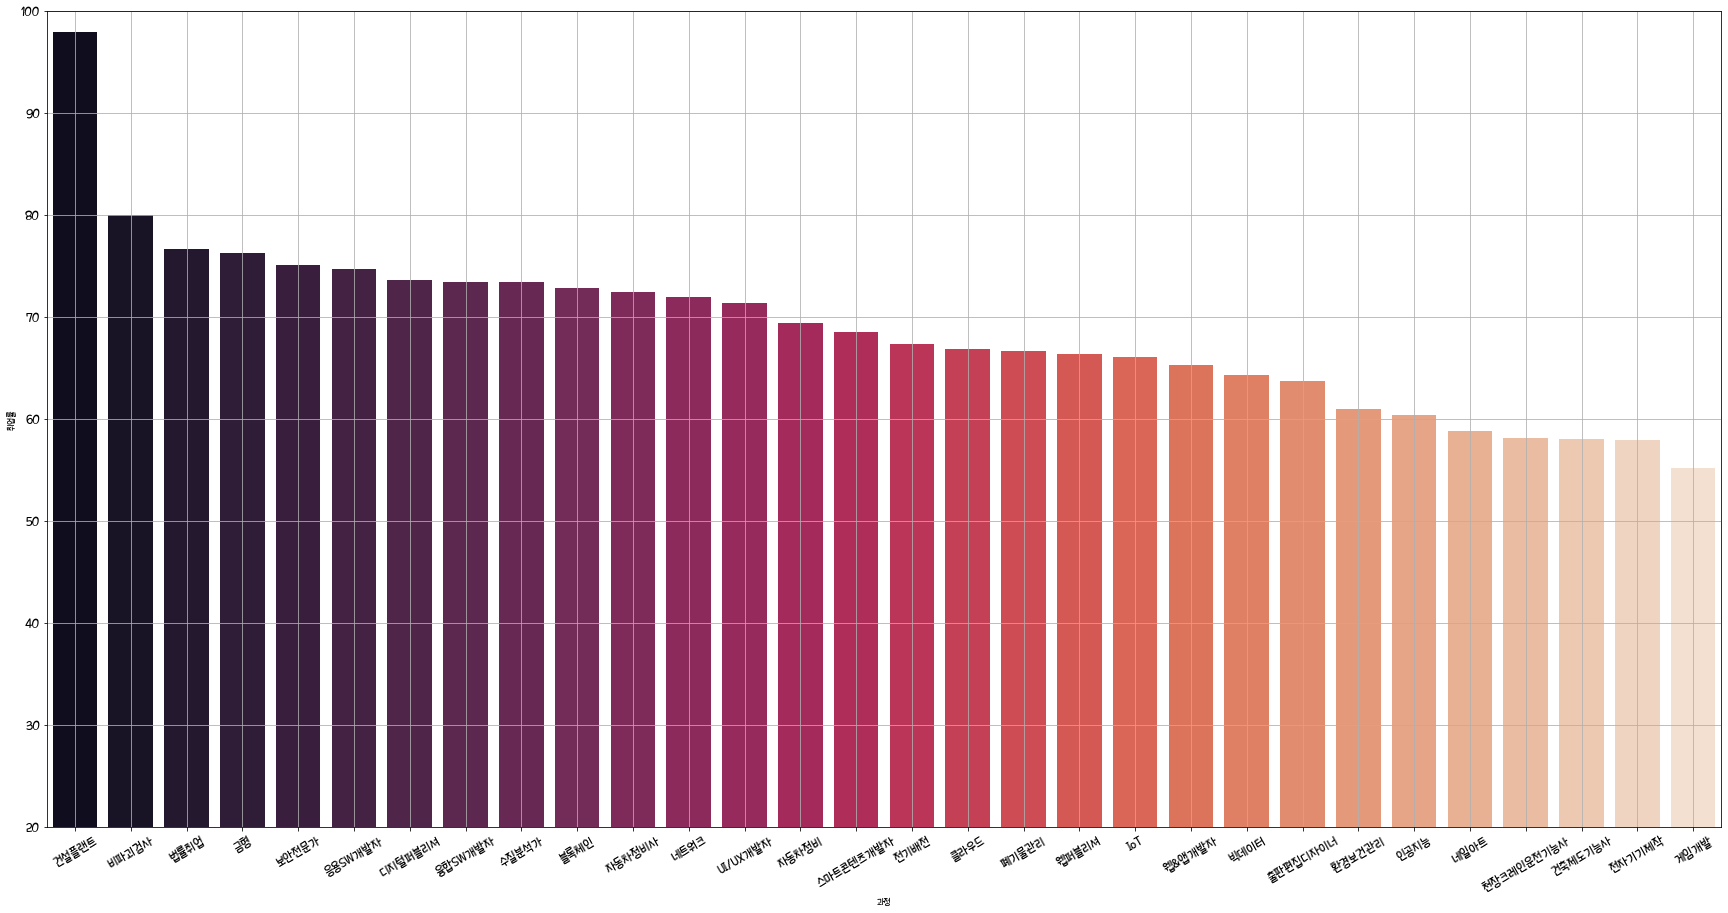

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('hrdcrolling/preprocessing/final.csv', index_col = 0)

df1 = df.loc[:,['NCS', '취업률','과정','연령대']]

# def age_filter(data, age):
#     return 10 < data["연령대"].mean() < age
df1.dropna(subset=['연령대'], inplace=True)
df1 = df1.groupby(["과정"]).mean()
# df1 = df1.reset_index(level=['과정'])
df1.sort_values(by=['취업률'], ascending=True, inplace=True)
df1 = df1.loc[(df1.연령대 < 30) & (df1.연령대 >= 20), :]
df1 = df1.sort_values(by=['취업률'], ascending= False)
df1 = df1.head(30)
display(df1)

# n = int(round(len(df)/2))

# df2 = df.tail(n)

fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)

sns.barplot(x=df1.index, y='취업률', data=df1, palette='rocket', ax=ax1)
# sns.barplot(x=df2.index, y='취업률', data=df2, palette='rocket', ax=ax2)
plt.xticks(size=14, rotation=30)
plt.yticks(size=14)
plt.grid(True)
plt.ylim(20, 100)

plt.savefig("20대취업률TOP10-1.png")
plt.show()
plt.close()

C:\Users\wima9\anaconda3\envs\pydatavenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wima9\anaconda3\envs\pydatavenv\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,과정명,과정수,기간,훈련비,정원,취업률,연령대,지역1,지역2,NCS
과정,,,,,,,,,,
웹퍼블리셔,366,366,366,366,366,366,366,366,366,366
시각디자인,262,262,262,262,262,262,262,262,262,262
기계설계제작,219,219,219,219,219,219,219,219,219,219
네일아트,184,184,184,184,184,184,184,183,183,184
웹&앱개발자,175,175,175,175,175,175,175,172,172,175
영상편집,169,169,169,169,169,169,169,169,169,169
응용SW개발자,149,149,149,149,149,149,149,149,149,149
융합SW개발자,122,122,122,122,122,122,122,121,121,122
헤어디자이너,117,117,117,117,117,117,117,117,117,117


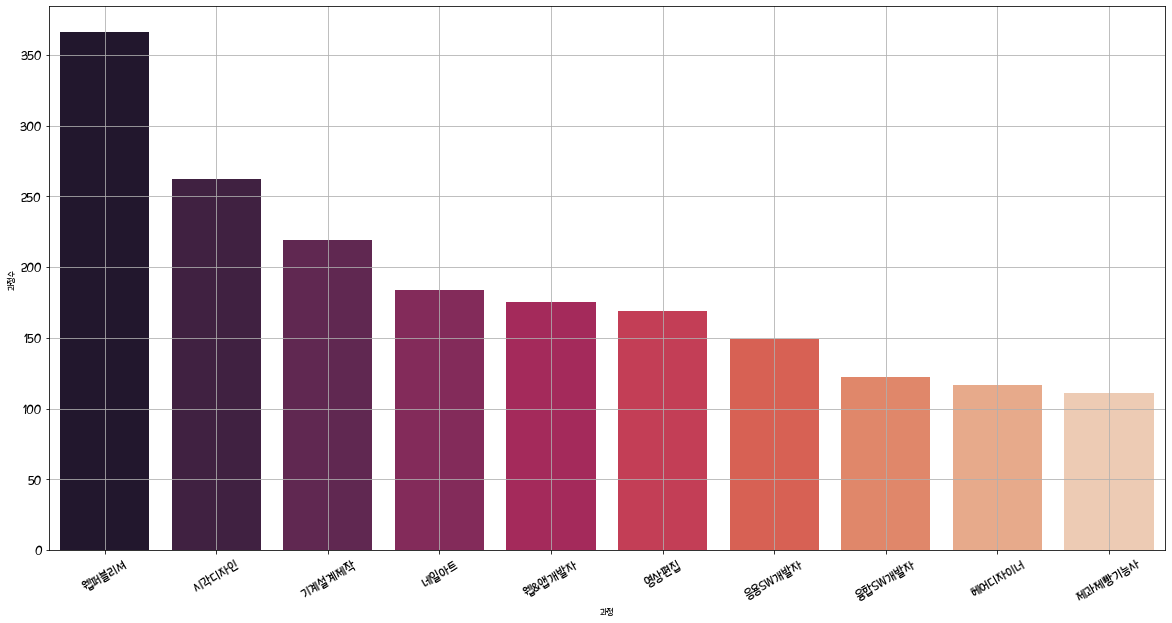

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df.loc[:,['취업률','과정','연령대']]
df1 = df.loc[(df.연령대 < 30) & (df.연령대 >= 20), :]
df1.dropna(subset=['연령대'], inplace=True)
df1.rename(columns = {'학원명' : '과정수'}, inplace = True)
df1 = df1.groupby(["과정"]).count()
df1.sort_values(by='과정수', ascending=False, inplace=True)
df1 = df1.head(10)
display(df1)

# 구역 설정
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 1, 1)

# 그래프 그리기
sns.barplot(x=df1.index, y='과정수' ,data=df1, palette="rocket", ax=ax1)
plt.xticks(size=14, rotation=30)
plt.yticks(size=14)
plt.grid(True)


# 출력 
plt.savefig("20대과정수TOP10.png")
plt.show()
plt.close()

In [34]:
# 연령별 선호 과정
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

a = df['연령대'] >= 20

df_20 = df[a]

b = df_20['연령대'] < 30

df_20 = df_20[b]

# display(df_20)

scorelist = range(30,0,-1)

df_20_corank = df_20.groupby(['과정']).count().sort_values(by=['과정명'], ascending=False).head(30)
df_20_corank = df_20_corank.loc[:,['과정명']]
df_20_corank.rename({'과정명':'과정수'}, axis='columns', inplace=True)
df_20_corank['선호도점수'] = scorelist
display(df_20_corank)

df_20_laterank = df_20.groupby(['과정']).mean().sort_values(by=['취업률'], ascending=False).head(30)
df_20_laterank = df_20_laterank.loc[:,['취업률']]
df_20_laterank['취업률점수'] = scorelist
display(df_20_laterank)

df_20_best = pd.concat([df_20_corank,df_20_laterank],axis=1, join='inner')
df_20_best['최적점수'] = df_20_best['선호도점수'] + df_20_best['취업률점수']
df_20_best = df_20_best.sort_values(by=['최적점수'], ascending=False)
display(df_20_best)

,과정수,선호도점수
과정,,
웹퍼블리셔,366,30
시각디자인,262,29
기계설계제작,219,28
네일아트,184,27
웹&앱개발자,175,26
영상편집,169,25
응용SW개발자,149,24
융합SW개발자,122,23
헤어디자이너,117,22


,취업률,취업률점수
과정,,
건설플랜트,98.000000,30
자동제어시스템,83.542857,29
가구제작,83.400000,28
특수용접산업기사/기사,80.150000,27
비파괴검사,80.000000,26
자동차정비기능사,77.900000,25
네트워크,77.570000,24
법률취업,76.700000,23
자동차정비사,76.457500,22


,과정수,선호도점수,취업률,취업률점수,최적점수
과정,,,,,
응용SW개발자,149,24,75.179195,19,43
융합SW개발자,122,23,73.362295,11,34
간호조무사,58,12,75.889655,20,32
기계설계제작,219,28,69.994977,3,31
보안전문가,70,13,75.171429,18,31
자동차정비사,40,9,76.457500,22,31
웹&앱개발자,175,26,68.774857,1,27
UI/UX개발자,99,20,71.376768,6,26
건축설계,84,15,72.342857,7,22
